## To find whether given employee will be promoted or not.

In [1]:
## step 1 Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Step 2 Loading the dataset
df=pd.read_csv('train.csv')
df.head()
df.rename(columns={'KPIs_met >80%':'KPIsgt80','awards_won?':'awards_won'},inplace=True)

In [3]:
df.shape

(54808, 14)

## step 3 Exploratory Data Analysis

In [ ]:
## step 3.1 variable description

Variable	                     Definition

[U]employee_id:-	                 Unique ID for employee

[C]department:-	                 Department of employee

[C]region:-	                     Region of employment (unordered)

[C]education:-  	                 Education Level

[C]gender:-                         Gender of Employee

[C]recruitment_channel:-	         Channel of recruitment for employee

[N]no_of_trainings	:-               no of other trainings completed in previous year on soft skills,                                      technical skills etc.

[N]age:-                             Age of Employee

[C]previous_year_rating:- 	         Employee Rating for the previous year

[N]length_of_service:-               Length of service in years

[C]KPIs_met >80%:-	                 if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
9
[C]awards_won?:-	                 if awards won during previous year then 1 else 0

[N]avg_training_score:-	               Average score in current training evaluations

[C]is_promoted	(Target):-             Recommended for promotion

In [3]:
## Step  3.2 Univariant Analysis
## Step 3.2.1 Analysing department
df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [5]:
## Step 3.2.2 Relationship with target variable
pd.crosstab(df.department,df.is_promoted,margins='all')
## Employees from Sales & Marketing and Operations have highest numbers of promotions

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


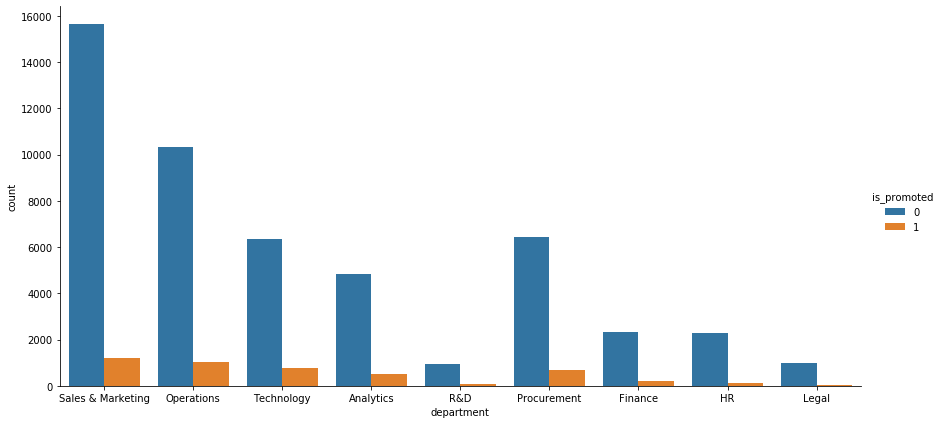

In [46]:
sns.catplot(data=df,x='department',kind='count',aspect=2,height=6,hue='is_promoted')

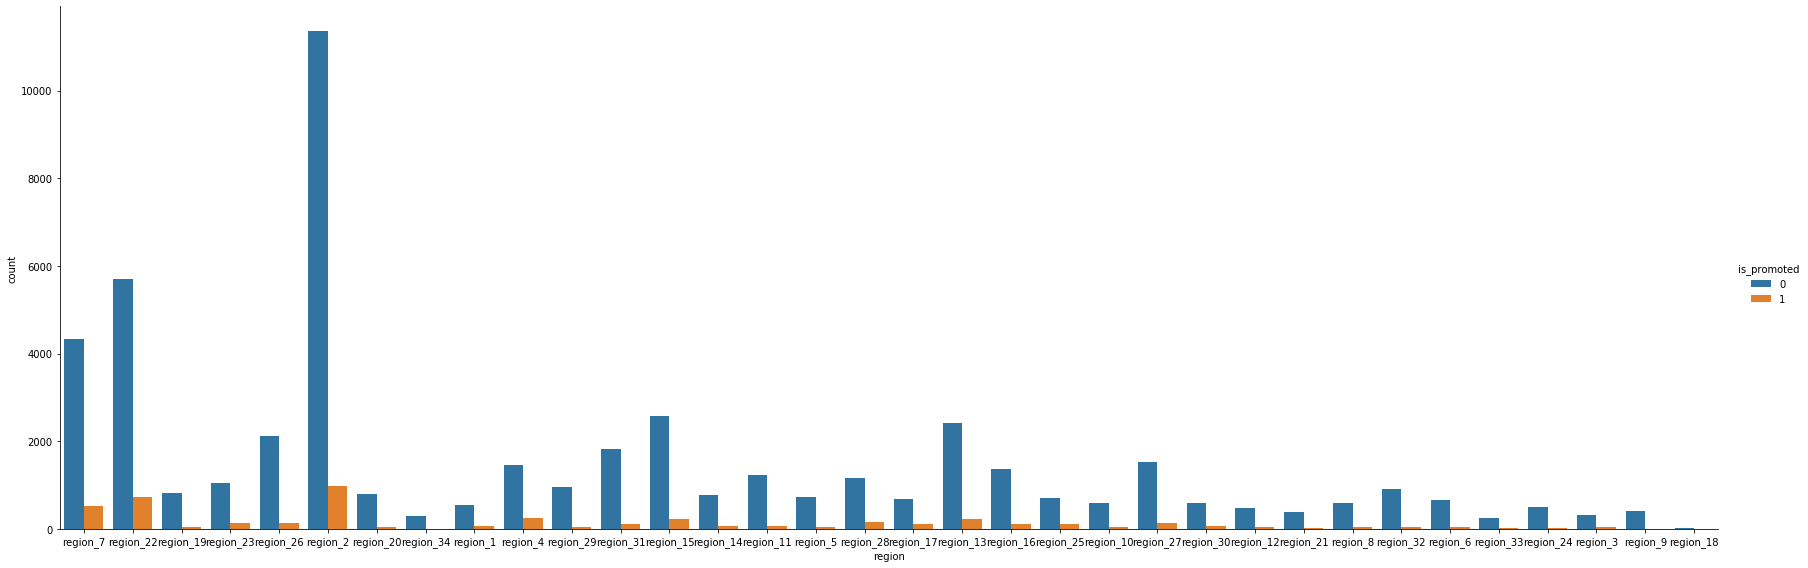

In [55]:
## step 3.2.3 Analysing region
df.region.value_counts()
pd.crosstab(df.region,df.is_promoted,margins='all')
sns.catplot(data=df,x='region',kind='count',aspect=3,height=8,hue='is_promoted')

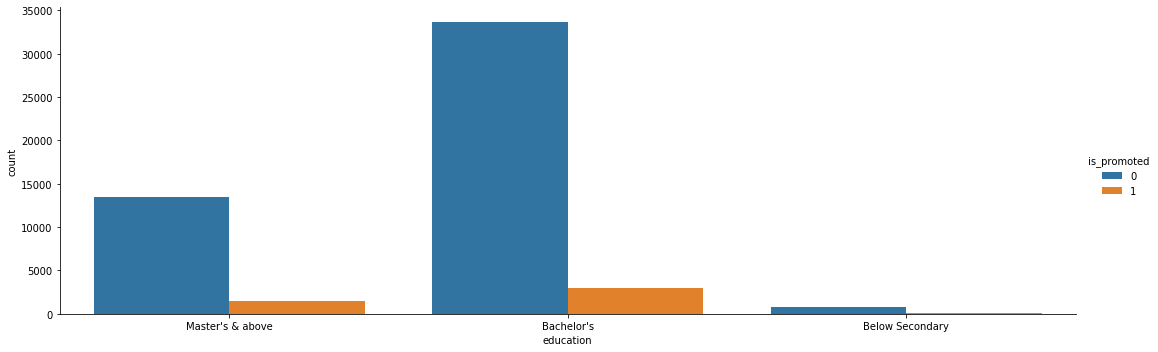

In [56]:
## step 3.2.4 Analysing education

df.education.value_counts()
pd.crosstab(df.education,df.is_promoted)
sns.catplot(data=df,x='education',kind='count',aspect=3,height=5,hue='is_promoted')

In [11]:
## step 3.2.5 Analysising gender
df.gender.value_counts()
pd.crosstab(df.gender,df.is_promoted)

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [12]:
## step 3.2.6 Analysing recruitment_channel
df.recruitment_channel.value_counts()
pd.crosstab(df.recruitment_channel,df.is_promoted,margins='all')

is_promoted,0,1,All
recruitment_channel,,,
other,27890,2556,30446
referred,1004,138,1142
sourcing,21246,1974,23220
All,50140,4668,54808


is_promoted,0,1,All
no_of_trainings,,,
1,40468,3910,44378
2,7382,605,7987
3,1654,122,1776
4,442,26,468
5,125,3,128
6,42,2,44
7,12,0,12
8,5,0,5
9,5,0,5


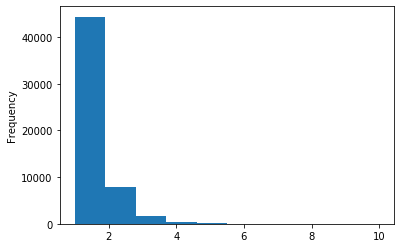

In [13]:
## step 3.2.7 Analysisng no_of_trainings
df['no_of_trainings'].plot(kind='hist',bins=10)
pd.crosstab(df.no_of_trainings,df.is_promoted,margins='all')

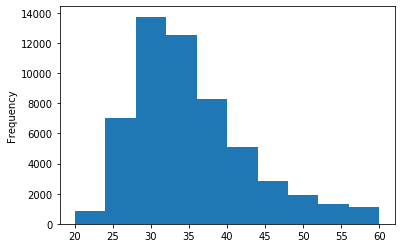

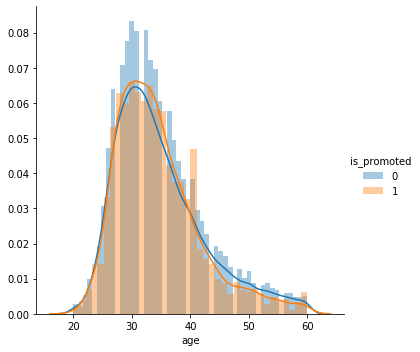

In [90]:
## step 3.2.8 Analysisng  age
df['age'].plot(kind='hist',bins=10)
sns.FacetGrid(df,hue='is_promoted',height=5).map(sns.distplot,'age').add_legend()

is_promoted,0,1,All
previous_year_rating,,,
1.0,6135,88,6223
2.0,4044,181,4225
3.0,17263,1355,18618
4.0,9093,784,9877
5.0,9820,1921,11741
All,46355,4329,50684


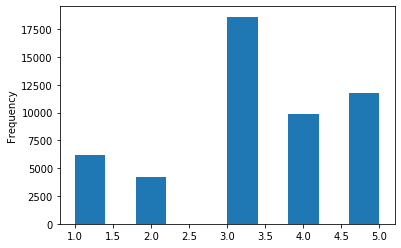

In [17]:
## Step 3.2.9 Analysis of previous_year_rating
df['previous_year_rating'].plot(kind='hist',bins=10)
pd.crosstab(df.previous_year_rating,df.is_promoted,margins='all')
sns.catplot(x='previous_year_rating',data=df,hue='is_promoted',kind='count')

is_promoted,0,1,All
length_of_service,,,
1,4170,377,4547
2,6089,595,6684
3,6424,609,7033
4,6238,598,6836
5,5357,475,5832
6,4333,401,4734
7,5087,464,5551
8,2614,269,2883
9,2400,229,2629


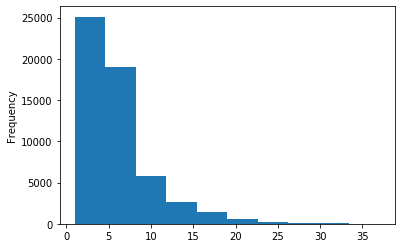

In [16]:
## Step 3.2.10 Analysing length_of_service
df['length_of_service'].plot(kind='hist',bins=10)
pd.crosstab(df.length_of_service,df.is_promoted,margins='all')
## As the length of service incerased,no of employees who got promotion is decreased.
## As employee with high length of serice are mostly ceo cto,mds etc so they dont need promotions
sns.catplot(x='length_of_service',data=df,hue='is_promoted',kind='count',height=6,aspect=2)

is_promoted,0,1,All
KPIsgt80,,,
0,34111,1406,35517
1,16029,3262,19291
All,50140,4668,54808


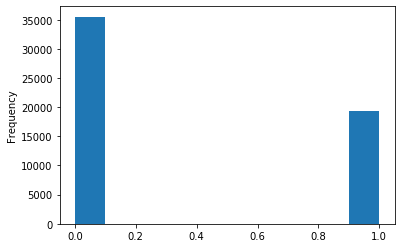

In [23]:
## Step 3.2.11 Analysis of KPIs_met >80%
df['KPIsgt80'].plot(kind='hist',bins=10)
pd.crosstab(df.KPIsgt80,df.is_promoted,margins='all')
sns.catplot(x='KPIsgt80',data=df,hue='is_promoted',kind='count')

In [30]:
## Step 3.2.12 Analysis on awards_won
df.awards_won.value_counts()
pd.crosstab(df.awards_won,df.is_promoted,margins='all')
sns.catplot(x='awards_won',data=df,hue='is_promoted',kind='count')

is_promoted,0,1,All
awards_won,,,
0,49429,4109,53538
1,711,559,1270
All,50140,4668,54808


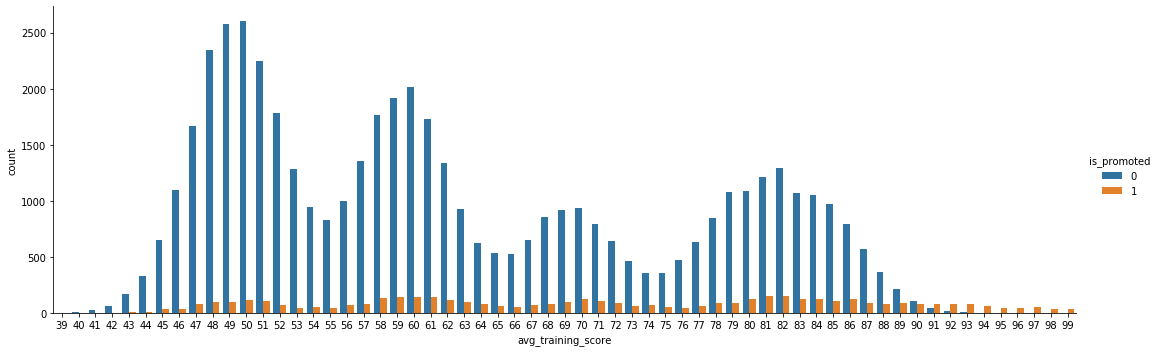

In [40]:
## Step 3.2.13 Analysis of avg_training_score
##df['avg_training_score'].plot(kind='hist',bins=10)
sns.catplot(x='avg_training_score',data=df,aspect=3,kind='count',hue='is_promoted')
## As the avg_training_score more,employess are getting promotions

## Step 4 Feature Engineering

In [4]:
## Step 4.1 Handling missing values 
df.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIsgt80                0.000000
awards_won              0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [5]:
## Step 4.1.1 Handling missing value at education
df.loc[df['education'].isnull()==True]
##df.education.isnull().mean()
## these values are missed because of manual entry and the percentage of missing values in eduaction is
## 4.39% hence wiil replace by most occuring category

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [3]:
##df.education.value_counts()
df.loc[df['education'].isnull()==True,'education']='Unknown'
df.education.isnull().sum()

0

In [4]:
## Step 4.1.2 Hnadling missing values for previous_year_rating
dm=df.loc[df['previous_year_rating'].isnull()==True]
dm.length_of_service.value_counts()
## Basically the values are not missed intenstionally as the employees who has joined previous year 
## Itselg how colud they can be rated so we will  create another category and trear them accordingly
df.previous_year_rating.value_counts(dropna=False)
df.loc[df['previous_year_rating'].isnull()==True,'previous_year_rating']=0.0

In [6]:
df.isnull().sum()
## SO now we have handled the missing values.

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIsgt80                0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

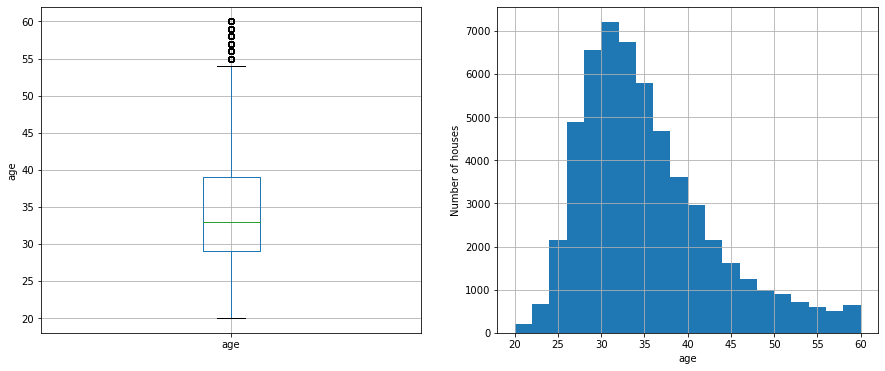

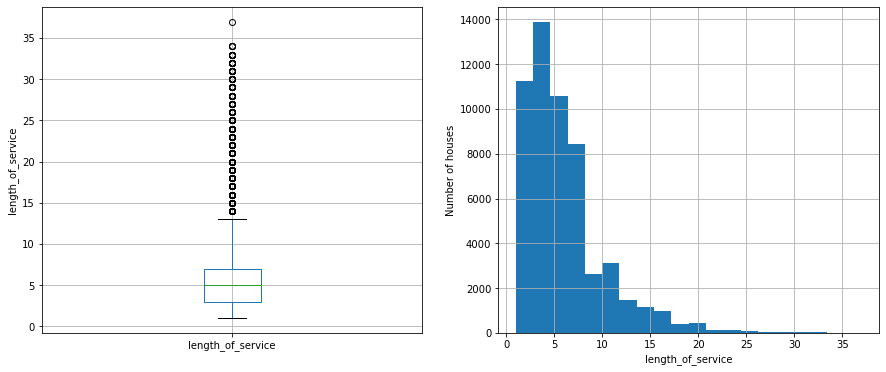

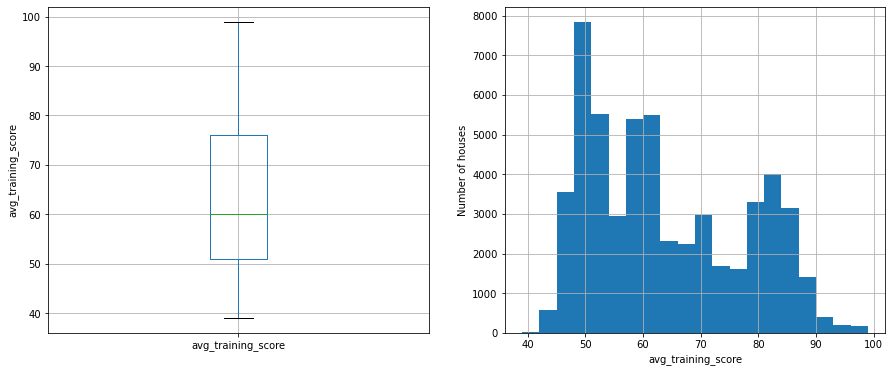

In [5]:
## Step 4.2 checking for outliers
## Numerical_features=['age','length_of_service',avg_training_score]
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution
for columns in df[['age','length_of_service','avg_training_score']]:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=columns)
    fig.set_title('')
    fig.set_ylabel(columns)
    
    plt.subplot(1, 2, 2)
    fig = df[columns].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(columns)

    plt.show()


In [9]:
## using interquantile range 
import numpy as np
##IQR = df.age.quantile(0.75) - df.age.quantile(0.25)

##Lower_fence = df.age.quantile(0.25) - (IQR * 1.5)
##Upper_fence = df.age.quantile(0.75) + (IQR * 1.5)

##Upper_fence, Lower_fence, IQR ## (54.0, 14.0, 10.0)
df.loc[df['age']>54,'age']=np.median(df['age'])



In [16]:
##IQR = df.length_of_service.quantile(0.75) - df.length_of_service.quantile(0.25)

##Lower_fence = df.length_of_service.quantile(0.25) - (IQR * 1.5)
##Upper_fence = df.length_of_service.quantile(0.75) + (IQR * 1.5)

##Upper_fence, Lower_fence, IQR
df.loc[df['length_of_service']>13].is_promoted.value_counts()
## In this case we should not remove these outliers as the length of service increase implies they might be
## in senior management

0    3255
1     234
Name: is_promoted, dtype: int64

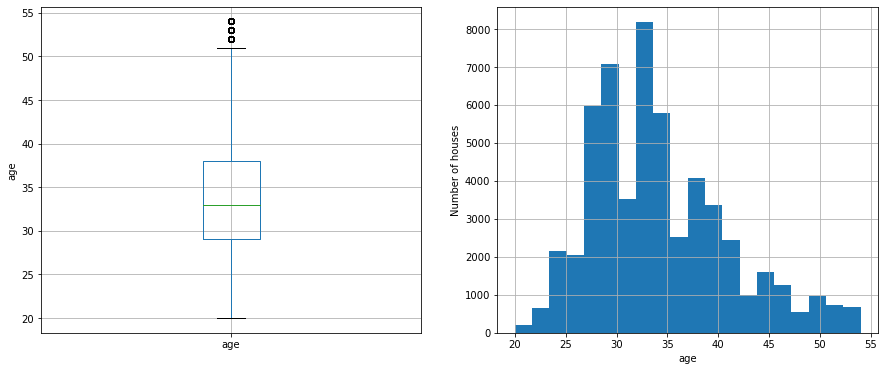

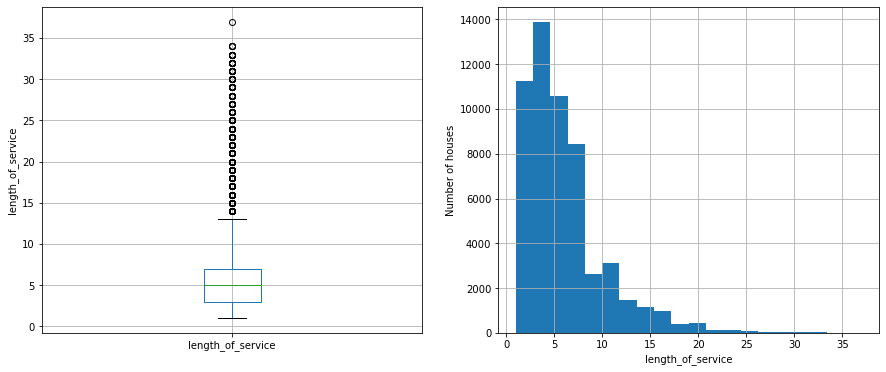

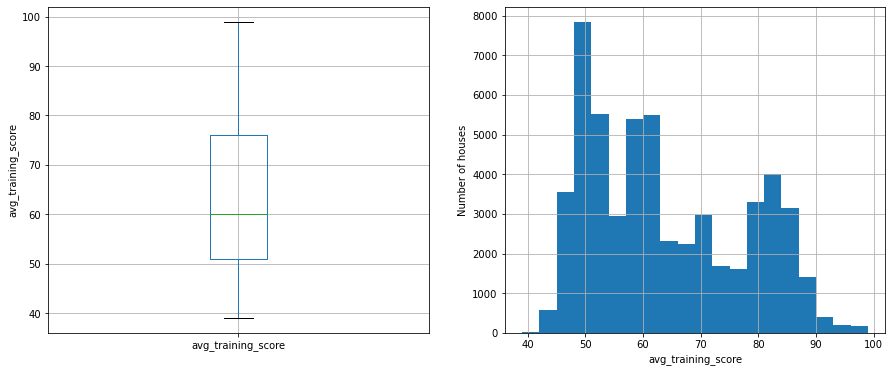

In [10]:
for columns in df[['age','length_of_service','avg_training_score']]:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=columns)
    fig.set_title('')
    fig.set_ylabel(columns)
    
    plt.subplot(1, 2, 2)
    fig = df[columns].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(columns)

    plt.show()


In [17]:
## lets sclae the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['age','length_of_service','avg_training_score']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [18]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,0.124033,5.0,0.500460,1,0,-1.075931,0
1,65141,Operations,region_22,Bachelor's,m,other,1,-0.621083,5.0,-0.437395,0,0,-0.253282,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,-0.024990,3.0,0.265996,0,0,-1.001145,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,0.720125,1.0,0.969387,0,0,-1.001145,0
4,48945,Technology,region_26,Bachelor's,m,other,1,1.614263,3.0,-0.906322,0,0,0.718939,0


In [19]:
## Step 4.3 Encoding the categorical variables
print('categorical labels in department:{}'.format(len(df.department.unique())))
print('categorical labels in region:{}'.format(len(df.region.unique())))
print('categorical labels in education:{}'.format(len(df.education.unique())))
print('categorical labels in recruitment_channel:{}'.format(len(df.recruitment_channel.unique())))


categorical labels in department:9
categorical labels in region:34
categorical labels in education:4
categorical labels in recruitment_channel:3


In [20]:
## label encoding all the categories
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['department']=label_encoder.fit_transform(df['department'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['region']=label_encoder.fit_transform(df['region'])
df['education']=label_encoder.fit_transform(df['education'])
df['recruitment_channel']=label_encoder.fit_transform(df['recruitment_channel'])


In [25]:
df.to_csv('employee.csv')

In [27]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,0.124033,5.0,0.500460,1,0,-1.075931,0
1,65141,4,14,0,1,0,1,-0.621083,5.0,-0.437395,0,0,-0.253282,0
2,7513,7,10,0,1,2,1,-0.024990,3.0,0.265996,0,0,-1.001145,0
3,2542,7,15,0,1,0,2,0.720125,1.0,0.969387,0,0,-1.001145,0
4,48945,8,18,0,1,0,1,1.614263,3.0,-0.906322,0,0,0.718939,0


In [2]:
data=pd.read_csv('employee.csv')

In [7]:
data.shape

(54808, 15)

## Step 5 Feature Selection

In [2]:
df=pd.read_csv('employee.csv')

In [4]:
df.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won,avg_training_score,is_promoted
0,0,65438,7,31,2,0,2,1,0.124033,5.0,0.500460,1,0,-1.075931,0
1,1,65141,4,14,0,1,0,1,-0.621083,5.0,-0.437395,0,0,-0.253282,0
2,2,7513,7,10,0,1,2,1,-0.024990,3.0,0.265996,0,0,-1.001145,0
3,3,2542,7,15,0,1,0,2,0.720125,1.0,0.969387,0,0,-1.001145,0
4,4,48945,8,18,0,1,0,1,1.614263,3.0,-0.906322,0,0,0.718939,0


In [6]:
X=df.iloc[:,2:14]
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won,avg_training_score
0,7,31,2,0,2,1,0.124033,5.0,0.500460,1,0,-1.075931
1,4,14,0,1,0,1,-0.621083,5.0,-0.437395,0,0,-0.253282
2,7,10,0,1,2,1,-0.024990,3.0,0.265996,0,0,-1.001145
3,7,15,0,1,0,2,0.720125,1.0,0.969387,0,0,-1.001145
4,8,18,0,1,0,1,1.614263,3.0,-0.906322,0,0,0.718939


In [4]:
## Step 5.1 Checking for constant fetaures
## lets divide the data as as X and y
X=df.iloc[:,2:14]
y=df.is_promoted
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)
constant_features = [
    feat for feat in X.columns if X[feat].std() == 0
]

len(constant_features)

0

In [ ]:
## So we dont have constant features in our dataset

In [38]:
## Step 5.2 Checking for quasi constant features
quasi_constant_feat = []
for feature in X.columns:

    # find the predominant value
    predominant = (X[feature].value_counts() / np.float(
        len(X))).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [39]:
## STep 5.3 Duplicate features
df.duplicated().sum()
## So we dont have duplicate features

0

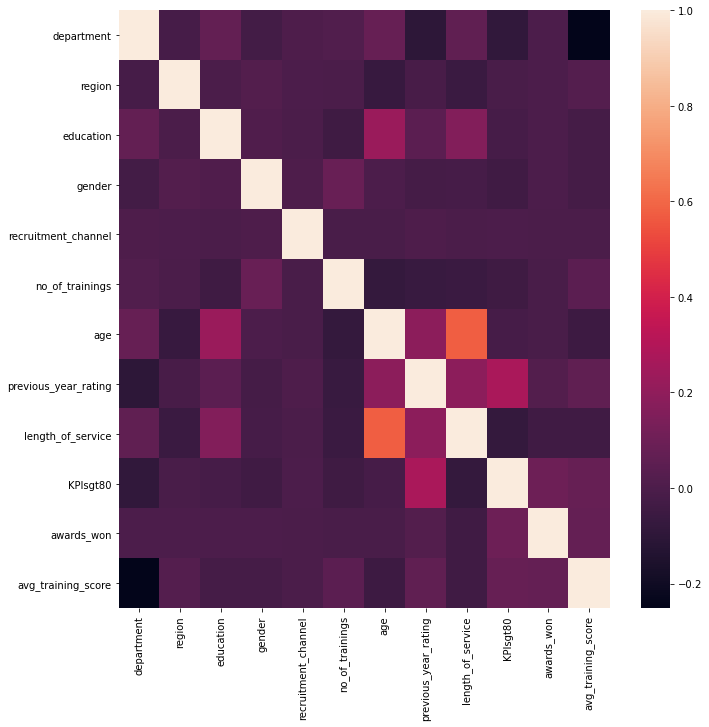

In [40]:
## checking the corelation among the variables
corrmat = X.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
## from heatmap it is clear that there is no strong corelation among variables

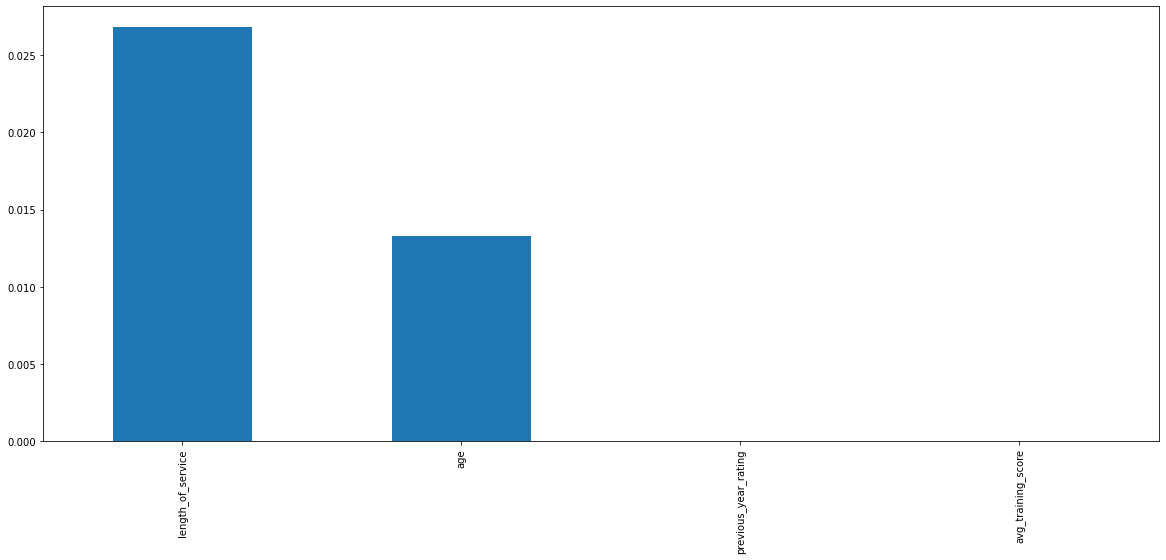

In [11]:
## univariant feature selction for numerical features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


numerics = ['float64']
numerical_vars = list(X_train.select_dtypes(include=numerics).columns)
data = X_train[numerical_vars]
data.shape

univariate = f_classif(data,y_train)
univariate
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = data.columns
univariate.sort_values(ascending=False, inplace=True)
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))
## lower the p value,predictive is the feature

In [12]:
## using chi2 test for categorical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
##apply selectkbest class to extract top 10 best features
bestfeatures=SelectKBest(score_func=chi2,k='all')
b=X_train[['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating','KPIsgt80','awards_won']]
fit=bestfeatures.fit(b,y_train)


In [13]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(b.columns)
## concatinating 2 df for better visulaization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['specs','score']
featureScores

,specs,score
0,department,0.389149
1,region,22.756207
2,education,3.190276
3,gender,0.794844
4,recruitment_channel,0.017041
5,no_of_trainings,8.140811
6,previous_year_rating,499.508443
7,KPIsgt80,1424.245736
8,awards_won,1720.474547


In [15]:
print(featureScores.nlargest(10,'score'))

                  specs        score
8            awards_won  1720.474547
7              KPIsgt80  1424.245736
6  previous_year_rating   499.508443
1                region    22.756207
5       no_of_trainings     8.140811
2             education     3.190276
3                gender     0.794844
0            department     0.389149
4   recruitment_channel     0.017041


In [17]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIsgt80,awards_won
0,65438,7,31,2,0,2,1,0.124033,5.0,0.500460,1,0
1,65141,4,14,0,1,0,1,-0.621083,5.0,-0.437395,0,0
2,7513,7,10,0,1,2,1,-0.024990,3.0,0.265996,0,0
3,2542,7,15,0,1,0,2,0.720125,1.0,0.969387,0,0
4,48945,8,18,0,1,0,1,1.614263,3.0,-0.906322,0,0


In [20]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [5]:
## Using formwrd selection method
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

sfs1 = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.6min finished

[2020-06-28 17:38:48] Features: 1/12 -- score: 0.6892357127189104[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.3min finished

[2020-06-28 17:40:07] Features: 2/12 -- score: 0.7428779619553139[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished

[2020-06-28 17:41:15] Features: 3/12 -- score: 0.7703727081824697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [6]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['department', 'previous_year_rating', 'KPIsgt80', 'awards_won'], dtype='object')

In [17]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [28]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']].fillna(0),
                  X_test[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8356896806926793
Test set
Random Forests roc-auc: 0.8229642350087142


## Modelling

### Checking the balance of data


In [7]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [14]:
from imblearn.combine import SMOTETomek


In [16]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [18]:
X_res.shape,y_res.shape

((99806, 12), (99806,))

In [19]:
X_train_res,X_test_res,y_train_res,y_test_res=train_test_split(X_res,y_res,test_size=.30,random_state=42)

### Predicting accuracy with different models

In [42]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", 
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "LightGBM", "XGBoost" ]   

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb#  for this i have to install package  "  !pip install lightgbm "
import xgboost as xgb

In [7]:
! pip install lightgbm

In [43]:
classifiers = [LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(),    
    xgb.XGBClassifier()
   ]

In [24]:

from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix

In [44]:
roc_auc_score=[]
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']], y_train)
    score = cross_val_score(clf, X_train[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']], y_train, cv=5, scoring='roc_auc')
    roc_auc_score.append(score.mean())
    print(names ,' : ' , score )
    

['Logistic Regression', 'Nearest Neighbors', 'Naive Bayes', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LDA', 'QDA', 'LightGBM', 'XGBoost']  :  [0.80155941 0.80834537 0.79694051 0.79900245 0.79973001]
['Logistic Regression', 'Nearest Neighbors', 'Naive Bayes', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LDA', 'QDA', 'LightGBM', 'XGBoost']  :  [0.74897377 0.74500295 0.73972105 0.754932   0.73664397]
['Logistic Regression', 'Nearest Neighbors', 'Naive Bayes', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LDA', 'QDA', 'LightGBM', 'XGBoost']  :  [0.794842   0.79977942 0.79183575 0.79315462 0.79563377]
['Logistic Regression', 'Nearest Neighbors', 'Naive Bayes', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LDA', 'QDA', 'LightGBM', 'XGBoost']  :  [0.81410257 0.8281123  0.81852603 0.8192453  0.82511331]
['Logistic Regressio

In [47]:

accuracy_scores = []
roc_auc_score=[]
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_res[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']], y_train)
    score = clf.score(X_test_res[['region', 'previous_year_rating', 'KPIsgt80', 'awards_won','department','avg_training_score','length_of_service']], y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score )

Logistic Regression  :  0.9149
Nearest Neighbors  :  0.921
Naive Bayes  :  0.9086
Gaussian Process  :  0.9244
Decision Tree  :  0.9207
Random Forest  :  0.9219
AdaBoost  :  0.938
Gradient Boosting  :  0.9094
LDA  :  0.9086
QDA  :  0.9176
LightGBM  :  0.9428
XGBoost  :  0.9413


In [49]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance
#printing accuracy score in descending order
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
10,LightGBM,0.9428
11,XGBoost,0.9413
6,AdaBoost,0.9380
3,Gaussian Process,0.9244
5,Random Forest,0.9219
1,Nearest Neighbors,0.9210
4,Decision Tree,0.9207
9,QDA,0.9176
0,Logistic Regression,0.9149
7,Gradient Boosting,0.9094


In [20]:
## Implementing XGB classifier
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
y_preditc=classifier.predict(X_test_res)

In [25]:
cm=confusion_matrix(y_test_res,y_preditc)

In [26]:
pd.crosstab(y_test_res,y_preditc)

col_0,0,1
is_promoted,,
0,15021,91
1,887,13943


In [27]:
class_report=classification_report(y_test_res,y_preditc)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15112
           1       0.99      0.94      0.97     14830

    accuracy                           0.97     29942
   macro avg       0.97      0.97      0.97     29942
weighted avg       0.97      0.97      0.97     29942



In [28]:
from sklearn.model_selection import cross_val_score
roc_score = cross_val_score(classifier,X_res ,y_res, cv = 10,scoring='roc_auc')

In [29]:
roc_score.mean()

0.9883415474032672